## Эксперимент - обучение проводится 4 эпохи вместо 10

In [23]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

import os

import matplotlib.pyplot as plt


In [25]:

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

train_dir = 'dataset_train'
test_dir = 'dataset_test'

image_size = (150, 150)
batch_size = 32
epochs = 4

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)


Found 1056 images belonging to 2 classes.
Found 4231 images belonging to 2 classes.


### Настраиваем и компилим модель

In [26]:
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

model = models.Sequential([
	layers.Input(shape=(150, 150, 3)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


### Обучаем модель на тренировочном датасете

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)


/home/v131v/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/4
33/33 ━━━━━━━━━━━━━━━━━━━━ 24s 729ms/step - accuracy: 0.5259 - loss: 1.2969 - val_accuracy: 0.7827 - val_loss: 0.5507
Epoch 2/4
33/33 ━━━━━━━━━━━━━━━━━━━━ 21s 655ms/step - accuracy: 0.7379 - loss: 0.5411 - val_accuracy: 0.9027 - val_loss: 0.2490
Epoch 3/4
33/33 ━━━━━━━━━━━━━━━━━━━━ 22s 674ms/step - accuracy: 0.8339 - loss: 0.3824 - val_accuracy: 0.8681 - val_loss: 0.3013
Epoch 4/4
33/33 ━━━━━━━━━━━━━━━━━━━━ 21s 642ms/step - accuracy: 0.8492 - loss: 0.3706 - val_accuracy: 0.8899 - val_loss: 0.2844


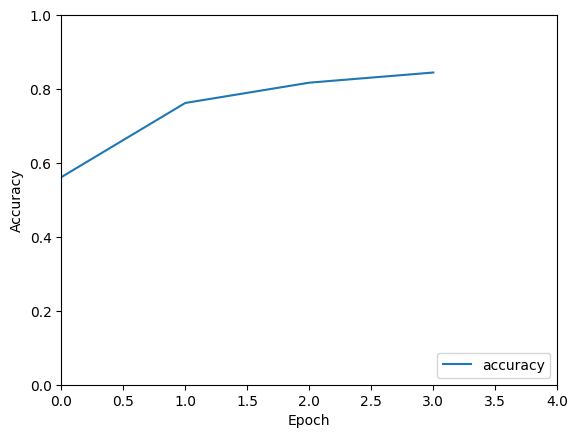

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.xlim([0, epochs])
plt.legend(loc='lower right')
plt.show()


### Оценка точности

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Точность на тестовых данных: {test_acc}")


133/133 ━━━━━━━━━━━━━━━━━━━━ 14s 108ms/step - accuracy: 0.8924 - loss: 0.2785
Точность на тестовых данных: 0.8898605704307556


### Результат - точность почти как с 10 эпохами

### Сохраняем модельку в keras формате

In [ ]:
# Сохранение модели
model.save('butterfly_classifier.keras')
